Цель:
Выполнить отбор признаков, найти модель оптимальной сложности, при которой переобучение минимально.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('forestfires.csv')

In [4]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
m = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 
     'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
data.month = data.month.map(m)
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
d = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7}
data.day = data.day.map(d)
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


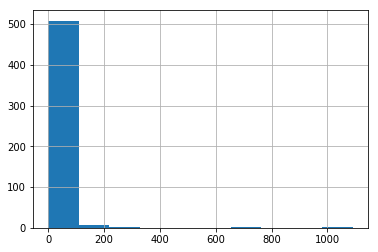

In [33]:
data['area'].hist();

In [66]:
# прологорифмируем, чтобы уменьшить асимметрию и увеличить симметрию, используем функцию логарифма y = ln (x + 1)
area = data['area']
log_area = np.log1p(area+1)

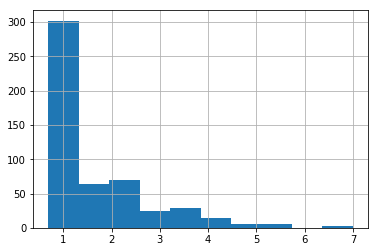

In [67]:
log_area.hist();

In [68]:
# Конечная преобразованная переменная будет цель выхода этой работы
log_area.head()

0    0.693147
1    0.693147
2    0.693147
3    0.693147
4    0.693147
Name: area, dtype: float64

In [100]:
# отбрасываем изначальный столбец из эксперементальных данных и присваемваем целевой функцией логорифмированное значение area
X_df, y_series = data.drop('area', axis=1), log_area

In [70]:
X_df.shape

(517, 12)

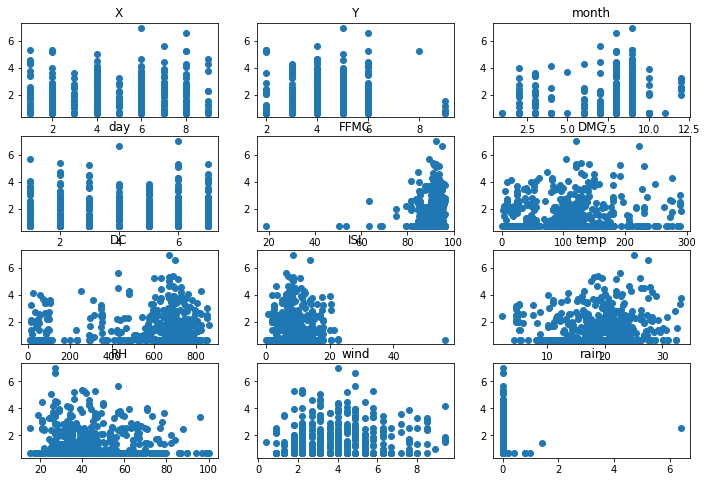

In [71]:
# визуализируем данные, построем точечную диаграмму y_series против X_df[col]
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_df.columns):
    plt.subplot(4, 3, i + 1)
    plt.scatter(X_df[col], y_series)
    plt.title(col);

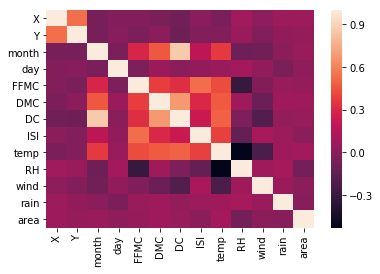

In [72]:
sns.heatmap(data.corr());

In [73]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, \
                                Ridge, RidgeCV

In [74]:
ols = LinearRegression(normalize=True)

In [75]:
# Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_valid, y_valid)

train_share = 0.7

train_part_len = int(train_share * data.shape[0])

X_train  = X_df.values[:train_part_len, :]
X_valid = X_df.values[train_part_len:, :]
y_train  = y_series.values[:train_part_len]
y_valid = y_series.values[train_part_len:]

In [76]:
from sklearn.metrics import mean_squared_error

In [ ]:
# 1

In [77]:
# проектирует матрицу для линейной регрессии
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [78]:
# ols - модель наименьших квадратов
# predict возвращает линейные предсказанные значения из проектной матрицы
y_ols_pred = ols.predict(X_valid)

In [79]:
# Среднеквадратичное отклонение - мера различий между значениями, предсказанными моделью и наблюдаемыми значениями.
def rmse(y, p):
    return np.sqrt(mean_squared_error(y, p))

In [81]:
# среднеквадратичная ошибка между линейной регрессии на обучающей и отложенной выборках
rmse(y_valid, y_ols_pred)

1.4356123781643495

In [80]:
def beatiful_coef(coefs, feature_names=X_df.columns):
    return pd.DataFrame(coefs, index=feature_names, columns=['coef']).sort_values('coef', ascending=False)

In [82]:
beatiful_coef(ols.coef_, feature_names=X_df.columns)

,coef
month,0.150223
X,0.044347
wind,0.018230
FFMC,0.008779
Y,0.008384
day,0.007523
DMC,0.005992
DC,-0.001232
RH,-0.011266
ISI,-0.023675


In [ ]:
# 2

In [83]:
# Ridge regression
ridge = Ridge(random_state=17, normalize=True)

In [84]:
# создаем матрицу для метода
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=17, solver='auto', tol=0.001)

In [86]:
ridge_valid_pred = ridge.predict(X_valid)

In [87]:
rmse(y_valid, ridge_valid_pred)

1.2970774335235464

In [85]:
beatiful_coef(ridge.coef_)

,coef
month,0.031323
wind,0.021294
Y,0.019566
X,0.015982
FFMC,0.003856
DMC,0.000882
DC,0.000038
RH,-0.003397
day,-0.004402
temp,-0.006680


In [ ]:
# 3

In [89]:
# Ridge regression with built-in cross-validation (критерий скользящего контроля)
alphas = np.logspace(-4, 4, 100)
ridge_cv = RidgeCV(alphas=alphas, cv=5, normalize=True).fit(X_train, y_train)

In [91]:
best_ridge_valid_pred = ridge_cv.predict(X_valid)

In [92]:
rmse(y_valid, best_ridge_valid_pred)

1.2604933108112713

In [101]:
beatiful_coef(ridge_cv.coef_)

,coef
month,0.009329
Y,0.006053
wind,0.005747
X,0.004537
FFMC,0.001251
DMC,0.000237
DC,0.000034
temp,-0.000817
RH,-0.000896
ISI,-0.001367


In [ ]:
# 4

In [93]:
# Lasso linear model with iterative fitting along a regularization path.
lasso = LassoCV(alphas=alphas, cv=5, normalize=True).fit(X_train, y_train)

In [95]:
best_lasso_valid_pred = lasso.predict(X_valid)

In [96]:
rmse(y_valid, best_lasso_valid_pred)

1.2568646264232679

In [97]:
beatiful_coef(lasso.coef_)

,coef
X,0.0
Y,0.0
month,0.0
day,-0.0
FFMC,0.0
DMC,0.0
DC,0.0
ISI,-0.0
temp,-0.0
RH,-0.0


Вывод:
Мы выполнили отбор признаков, моделями оптимальной сложности являются Ridge regression (Метод регуляризации Тихонова) и Ridge regression with built-in cross-validation, при которых переобучение минимально. В первом случае показатель rmse имеет большое значение, а в последнем возникает переобучение из-за переусложненной структуры.